# INTRODUCTION: PART I

This analysis was done as a part of an internship with HDFC Bank India. The crux of the project is that I had to analyse the current banking structure of India and provide my understanding to the team. The data was downloaded from the Reserve Bank Of India(RBI) website for two corresponding years (2018 & 2019) for the month of May. The excel files were initially re-configured to make sure Python could be used on it, because some of the columns were overlapping with each other. For more information regarding RBI and Indian Banks visit the: https://dbie.rbi.org.in/ website

This dataset consists of 64 registered banks in India who operate under the RBI norms. Each month they have to upload their transaction reports to the RBI. This was done in cognizance of further scrutiny of the Indian Banks who were under extreme financial stress due to distribution of wayward loans. 
> **POS stands for Point Of Sales Machines used for credit card and debit card transactions**

The dataset consists of:
- The count of ATM machines offsite/onsite,POS offsite
- The transaction count for that month for both Credit Card and Debit Card for ATM and POS
- The amount of transaction for both Credit Card an Debit Card (ATM & POS)

##  Understanding the Dataframe
### 2019 Dataset

- Importing pandas library to python for analysing the data
- Creating a dataframe 'df_2019' to attach the data
- The first dataframe consists of the May 2019 excel file

In [1]:
import pandas as pd
df_2019=pd.read_excel("May_2019.copy.XLSX")

To further understand the dataframe we use 'shape function to see the number of rows and columns
- Output: The output mentions that there are 65 rows and 16 columns

In [2]:
print(df_2019.shape)

(65, 16)


We use the head and tail features to see the first 5 and last 5 values of the dataframe, this gives us an idea of what values to encounter in the dataframe
1. Output: We see that at the tail there is a redundant row 'Total' which sums up all the values for each column but maybe detrimental during analysis. We will drop that row and continue our analysis. 

In [3]:
df_2019.head(5)

,Sr.No,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
0,1.0,ALLAHABAD BANK,761,196,3116,0,0,0,0,0.000000,0.000000,5910582,9068676,3259136,22773.785279,3491.793271
1,2.0,ANDHRA BANK,3023,773,13777,0,303397,13624,615600,62.738465,1495.788702,28852129,10811586,6953162,38154.666442,9341.300000
2,3.0,BANK OF BARODA,9321,3850,78791,0,324275,21107,838895,92.758064,1883.972070,48888337,32035602,16675739,125633.462026,14651.528985
3,4.0,BANK OF INDIA,2645,3509,67740,0,185605,22457,344241,127.086755,849.792205,36822577,19297659,10305371,70860.315525,11220.117556
4,5.0,BANK OF MAHARASHTRA,1306,554,2350,0,0,0,0,0.000000,0.000000,5649325,7684055,4955403,28463.649115,5602.625140


In [4]:
df_2019.tail(5)

,Sr.No,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
60,61.0,NORTH EAST SMALL FINANCE BANK LIMITED,0,0,0,0,0,0,0,0.000000,0.000000,58716,9712,2616,3.396120e+01,12.725397
61,62.0,SURYODAY SMALL FINANCE BANK LIMITED,25,1,0,0,0,0,0,0.000000,0.000000,18118,33576,9926,6.357020e+01,14.004844
62,63.0,UJJIVAN SMALL FINANCE BANK LIMITED,384,3,0,0,0,0,0,0.000000,0.000000,3108364,2053913,305994,8.379599e+03,262.127717
63,64.0,UTKARSH SMALL FINANCE BANK LIMITED,91,36,0,0,0,0,0,0.000000,0.000000,195956,86281,42669,3.125981e+02,124.805201
64,NaN,Total,109718,97101,3845111,0,48920802,889516,173153090,4173.211375,612824.645954,800437073,815710204,412530896,2.946668e+06,580468.033340


## Explanation of the column names and the values in the rows

The rows have the counts of both ATM and POS machines which are operational for each bank. The column labels state the particular count/amount for that bank. 
> So for example: CC_ATM_Transaction stands for Credit Card-ATM-Transaction i.e, ATM transactions for that particular card type for the individual bank.
1. **ATM_Oniste**:  Number of ATM deployed on site by the bank.
2. **ATM_Offsite**: Number of ATM deployed off site by the bank.
3. **POS_Online**:  Number of POS deployed online by the bank
4. **POS_Offline**: Number of POS deployed offline by the bank
5. **CC_Outstanding**: Total number of credit cards issued outstanding (after adjusting the number of cards withdrawan/cancelled).
6. **CC_ATM_Transaction**: Total number of financial transactions done by the credit card issued by the bank at ATMs
7. **CC_POS_Transaction**: Total number of financial transactions done by the credit card issued by the bank at POS terminals
8. **CC_ATM_Amount**: Total value of financial transactions done by the credit card issued by the bank at ATMs
9. **CC_POS_Amount**: Total value of financial transactions done by the credit card issued by the bank at POS terminals.
10. **DC_Oustanding**: Total number of debit cards issued outstanding (after adjusting the number of cards withdrawan/cancelled).
11. **DC_ATM_Transaction**: Total number of financial transactions done by the debit card issued by the bank at ATMs
12. **DC_POS_Transaction**: Total number of financial transactions done by the debit card issued by the bank at POS terminals
13. **DC_ATM_amount**: Total value of financial transactions done by the debit card issued by the bank at ATMs
14. **DC_POS_amount**: Total value of financial transactions done by the debit card issued by the bank at POS terminals.

In [5]:
df_2019.drop([64],axis=0,inplace=True)
df_2019.drop('Sr.No',axis=1,inplace=True)

Now we use describe to further make sense of the data.
The function describe gives us counts, the 25th percentile to the 75th percentile of the values, min and max as well as the mean. This function is highly recommended for one to understand the range of the dataset. 
> The **describe** function is self explanatory and gives one an overall outlook of the dataset.

In [6]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
ATM_Onsite,64.0,1.714344e+03,3.571981e+03,0.0,69.500000,4.770000e+02,2.238000e+03,2.560600e+04
ATM_Offsite,64.0,1.517203e+03,4.538884e+03,0.0,2.000000,2.710000e+02,7.810000e+02,3.288300e+04
POS_Online,64.0,6.007986e+04,1.518664e+05,0.0,0.000000,4.984500e+03,2.640100e+04,7.371030e+05
POS_Offline,64.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
CC_Outstanding,64.0,7.643875e+05,2.215087e+06,0.0,0.000000,9.630000e+02,2.150530e+05,1.267985e+07
CC_ATM_Transaction,64.0,1.389869e+04,3.532855e+04,0.0,0.000000,4.500000e+01,5.952250e+03,1.853650e+05
CC_POS_Transaction,64.0,2.705517e+06,7.926083e+06,0.0,0.000000,1.896000e+03,4.120808e+05,4.587032e+07
CC_ATM_Amount,64.0,6.520643e+01,1.725828e+02,0.0,0.000000,1.729500e-01,2.948612e+01,1.087520e+03
CC_POS_Amount,64.0,9.575385e+03,2.830206e+04,0.0,0.000000,1.063755e+01,1.107181e+03,1.720327e+05
DC_Oustanding,64.0,1.250683e+07,3.807818e+07,0.0,529427.750000,2.758882e+06,1.147416e+07,2.971657e+08


In [7]:
df_2019.drop('POS_Offline',axis=1,inplace=True)

### All the banks in the dataset

- The dataset has a combination of both government and private banks. This will be segregated later for further analysis.

In [8]:
for col in df_2019.select_dtypes(include='object').columns:
    print(col)
    print(df_2019[col].unique())

Bank Name
['ALLAHABAD BANK' 'ANDHRA BANK' 'BANK OF BARODA' 'BANK OF INDIA'
 'BANK OF MAHARASHTRA' 'CANARA BANK' 'CENTRAL BANK OF INDIA'
 'CORPORATION BANK' 'INDIAN BANK' 'INDIAN OVERSEAS BANK'
 'ORIENTAL BANK OF COMMERCE' 'PUNJAB AND SIND BANK' 'PUNJAB NATIONAL BANK'
 'SYNDICATE BANK' 'UCO BANK' 'UNION BANK OF INDIA' 'UNITED BANK OF INDIA'
 'IDBI LTD' 'STATE BANK OF INDIA' 'AXIS BANK LTD' 'BANDHAN BANK LTD'
 'CATHOLIC SYRIAN BANK LTD' 'CITY UNION BANK' 'DCB BANK LTD'
 'DHANALAKSHMI BANK LTD' 'FEDERAL BANK LTD' 'HDFC BANK LTD'
 'ICICI BANK LTD' 'IDFC Bank Limited' 'INDUSIND BANK LTD'
 'JAMMU AND KASHMIR BANK' 'KARNATAKA BANK LTD' 'KARUR VYSYA BANK LTD'
 'KOTAK MAHINDRA BANK LTD' 'RATNAKAR BANK LIMITED' 'SOUTH INDIAN BANK'
 'TAMILNAD MERCANTILE BANK LTD' 'THE LAXMI VILAS BANK LTD' 'YES BANK LTD'
 'AMERICAN EXPRESS' 'BANK OF AMERICA' 'BARCLAYS BANK PLC' 'CITI BANK'
 'DBS BANK' 'DEUTSCHE BANK LTD' 'HONGKONG AND SHANGHAI BKG CORPN'
 'STANDARD CHARTERED BANK LTD' 'ADITYA BIRLA IDEA PAYMENTS 

## DATA TRANSFORMATION AND CLEANING DATA

### Segregating the dataset on the basis of government and private banks

> A new column will be added to the dataframe to give the banks a new segregation according to their ownership type. This will help us to understand the data much better at a Macro level.

The segregation will be based on two bank types government and private banks

In [9]:
bank_type=[]
for row in df_2019['Bank Name']:
    if row=='ALLAHABAD BANK' or row=='ANDHRA BANK' or row=='BANK OF BARODA' or row== 'BANK OF INDIA' or row=='BANK OF MAHARASHTRA'or row=='CANARA BANK' or row=='CENTRAL BANK OF INDIA' or row== 'CORPORATION BANK' or row== 'INDIAN BANK' or row== 'INDIAN OVERSEAS BANK' or row== 'ORIENTAL BANK OF COMMERCE' or row=='PUNJAB AND SIND BANK' or row== 'PUNJAB NATIONAL BANK' or row=='SYNDICATE BANK' or row=='UCO BANK' or row=='UNION BANK OF INDIA' or row=='UNITED BANK OF INDIA' or row== 'STATE BANK OF INDIA' or row=='CITY UNION BANK' or row== 'JAMMU AND KASHMIR BANK' or row=='KARNATAKA BANK LTD':
        bank_type.append('Government Bank')
    else:
        bank_type.append('Private Bank')

In [10]:
df_2019['bank_type']=bank_type

In [11]:
df_2019.head(2)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.000000,0.000000,5910582,9068676,3259136,22773.785279,3491.793271,Government Bank
1,ANDHRA BANK,3023,773,13777,303397,13624,615600,62.738465,1495.788702,28852129,10811586,6953162,38154.666442,9341.300000,Government Bank


In [12]:
df_2019.bank_type.value_counts()

Private Bank       43
Government Bank    21
Name: bank_type, dtype: int64

*From the below output we can understand that there are 43 private banks in the dataset and 21 government banks*

In [13]:
banks_percentage=df_2019.bank_type.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
banks_percentage

Private Bank       67.2%
Government Bank    32.8%
Name: bank_type, dtype: object

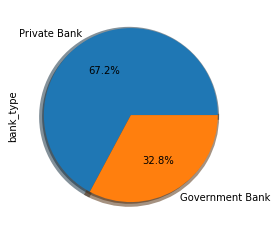

In [14]:
import matplotlib.pyplot as plt
(df_2019["bank_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=False, wedgeprops={'linewidth': 6}, radius=1)
plt.show()

### Expanding  POS and ATM transaction values

- The Transaction values are in INR crores but the zeros are removed in the original dataset
- In our analysis it is required to convert the transaction value to get the accurate representation of per card value
> For Example: The formula we use is: **Credit Card POS Amount= Credit Card POS Amount x INR 10,00,000**
- This gives us the new POS Amount for the particular dataset

In [15]:
df_2019['DC_POS_amount']=df_2019['DC_POS_amount']*1000000

In [16]:
df_2019['CC_POS_Amount']=df_2019['CC_POS_Amount']*1000000

Similar functions will be conducted on credit card and debit card ATM transaction values

In [17]:
df_2019['DC_ATM_amount']=df_2019['DC_ATM_amount']*1000000

In [18]:
df_2019['CC_ATM_Amount']=df_2019['CC_ATM_Amount']*1000000

## Average transaction value per card type of a bank


In the next step of analysis, we will be creating new columns in the dataframe to calculate the average transaction value per card type of a bank. 
> The formula used will be: **Average Transaction Value(card type): Total Value of Transactions/Total number of transactions**

- This will help one understand if the banks are doing well in terms of their ATM deployment or POS machine swipes and give further room for more analysis.
 > **Point to be noted**: This does not paint the accurate picture of how well the bank is performing because there are other factors to be considered while calculating performance. However, in terms of absolute numbers this maybe useful to understand the bank performance

In [19]:
for ind,row in df_2019.iterrows():
    df_2019.loc[ind,"DC_POS_PTransac2019"]=row["DC_POS_amount"]/row["DC_POS_Transaction"] if row["DC_POS_Transaction"]!=0 else 0

In [20]:
df_2019.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_POS_PTransac2019
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.0,0.0,5910582,9068676,3259136,2.277379e+10,3.491793e+09,Government Bank,1071.38618


As seen above one can find the **'Per Transaction'** column at the end of the dataframe. The above function was done for Debit Card POS transactions. Similar functions will be carried for Credit Card as well.

In [21]:
for ind,row in df_2019.iterrows():
    df_2019.loc[ind,"CC_POS_PTransac2019"]=row["CC_POS_Amount"]/row["CC_POS_Transaction"] if row["CC_POS_Transaction"]!=0 else 0

In [22]:
for ind,row in df_2019.iterrows():
    df_2019.loc[ind,"CC_ATM_PTransac2019"]=row["CC_ATM_Amount"]/row["CC_ATM_Transaction"] if row["CC_ATM_Transaction"]!=0 else 0

In [23]:
for ind,row in df_2019.iterrows():
    df_2019.loc[ind,"DC_ATM_PTransac2019"]=row["DC_ATM_amount"]/row["DC_ATM_Transaction"] if row["DC_ATM_Transaction"]!=0 else 0

In [24]:
df_2019.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_POS_PTransac2019,CC_POS_PTransac2019,CC_ATM_PTransac2019,DC_ATM_PTransac2019
0,ALLAHABAD BANK,761,196,3116,0,0,0,0.0,0.0,5910582,9068676,3259136,2.277379e+10,3.491793e+09,Government Bank,1071.38618,0.0,0.0,2511.258014


### Group and plot certain Numerical variables together for a comparison study with the target variable

In [25]:
cols1 = df_2019[['ATM_Onsite','ATM_Offsite','POS_Online']].columns.tolist()
cols2 = df_2019[['CC_Outstanding','CC_ATM_Transaction','CC_POS_Transaction']].columns.tolist()
cols3 = df_2019[['DC_ATM_Transaction','DC_POS_Transaction','DC_ATM_amount']].columns.tolist()
cols5 = df_2019[['DC_Oustanding','DC_POS_PTransac2019','CC_POS_PTransac2019']]
cols6 = df_2019[['CC_ATM_PTransac2019','DC_ATM_PTransac2019']]

In [26]:
import seaborn as sns
def bi_plot(x):
    plt.figure(figsize=(12,7))
    for i,count in enumerate(x):
        plt.subplot(2,2,i+1)
        #plt.subplots_adjust(hspace=3, wspace=7)
        sns.boxplot(df_2019['bank_type'],df_2019[count],palette="YlOrBr_r",showmeans=True,showfliers=False)#hue_order=['Private Bank','Government Bank'])
        plt.title('Bank Ownership Vs '+count,fontsize=12,fontweight = 'bold')
        plt.tight_layout()

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


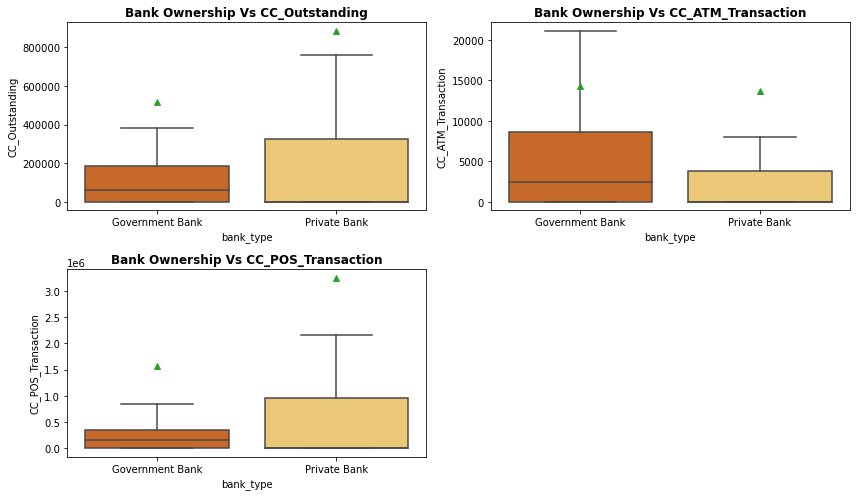

In [27]:
bi_plot(cols2)

C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sanyalam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


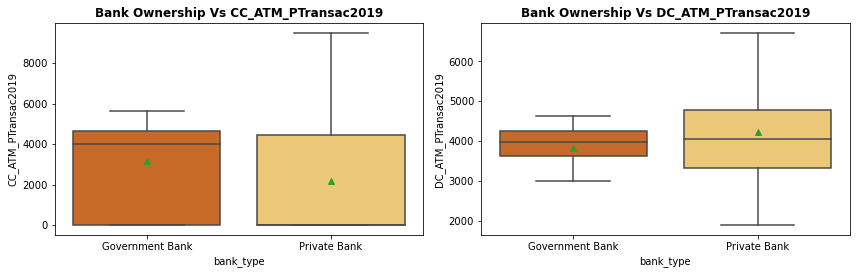

In [28]:
bi_plot(cols6)

### Sorting on the basis of ownership of banks: Government and Private

> Two new separate datasets will be created: one will only consist of government banks and the other private.

In [29]:
government_bank=(df_2019['bank_type']=='Government Bank')
government_2019=df_2019[government_bank]

In [30]:
private_bank=(df_2019['bank_type']=='Private Bank')
private_2019=df_2019[private_bank]

### Basic Data Visualisation of the government dataset

 > We will be plotting the Avergage Transaction value for DC of government banks. This will give us an idea of how the banks stack up with eatch other

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
median_govt=government_2019['DC_POS_PTransac2019'].median()
median_govt

1264.670437639341

For data visualisation we have imported both seaborn and matplotlib functions. 
> Median is taken here because it is a better estimator than mean as it is not distorted by outliers. 

We have mapped two values in this below graph
- On the left Y axis is the ***Average value per transaction*** of debit cards(POS Machine)
- On the right Y axis is the ***number*** of Debit Card transactions 

### Inference from the plot
- The bank with the highest average value per transaction is **Jammu and Kashmir Bank** and the lowest being **Bank of Baroda**
- But herein the line plot of number of Debit card transactions comes into play
- We can infer that even though J&K Bank had the highest but in terms of transactions it is way lower than the other banks.
> **State Bank of India** with the highest number of transactions has done well along with **Canara Bank** in maintaining average transaction value

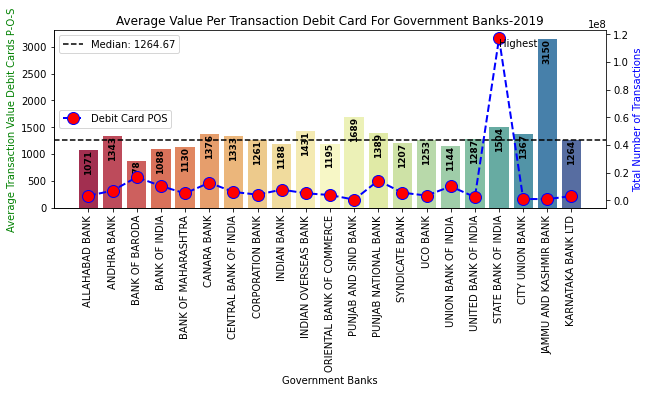

In [33]:
plot=sns.catplot(x="Bank Name",y="DC_POS_PTransac2019",data=government_2019,kind='bar',height=3,aspect=3,palette='Spectral')
plt.axhline(median_govt,color='k',linestyle="--",label='Median: 1264.67')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel("Government Banks")
plt.ylabel("Average Transaction Value Debit Cards P-O-S", color='g')
plt.title('Average Value Per Transaction Debit Card For Government Banks-2019')
plt.grid(False)

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='top', 
        color='black',
        fontweight='bold',
        rotation=90,
        size=9)

x = government_2019["Bank Name"]
y = government_2019["DC_POS_Transaction"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='Debit Card POS',marker='o', markerfacecolor='red',markersize=12,linestyle='dashed', linewidth = 2)
plt.legend(loc='center left')
axes2.set_ylabel('Total Number of Transactions',color='b')
axes2.annotate('Highest',(17,1.11e8),color='black',ha='left')
plt.grid(False)
plt.savefig('spectral1.png',bbox_inches='tight')

## 2018 Dataset

We will perform the same functions conducted above for the 2018 dataset as well, this will help us get two main dataframes to work further on our analysis

>**Disclaimer**: Since it is almost a repeat of the above functions. some definitons will not be repeated so as to keep the document more compact and creating room to delve into newer analysis.

In [34]:
df_2018=pd.read_excel("May_2018 - Copy.XLS")

In [35]:
df_2018.tail(2)

,Sr.No,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount
65,66.0,UTKARSH SMALL FINANCE BANK LIMITED,62,34,0,0,0,0,0,0.000000,0.000000,44043,144572,8574,4.255318e+02,10.300426
66,NaN,Total,107230,99759,3247096,0,38604630,748783,138290485,3500.192271,472847.658263,923962038,748042005,352117113,2.647508e+06,468079.355028


In [36]:
df_2018.drop('Sr.No',axis=1,inplace=True)
df_2018.drop([66],axis=0,inplace=True)

In [37]:
print(df_2018.shape)

(66, 15)


**Inference**: There are 66 rows indicating that there are 66 banks in the dataset along with 15 columns of categories. So, basically there were two banks that had been there in 2018 which stopped operating as of 2019. 

In [38]:
bank_type=[]
for row in df_2018['Bank Name']:
    if row=='ALLAHABAD BANK' or row=='ANDHRA BANK' or row=='BANK OF BARODA' or row== 'BANK OF INDIA' or row=='BANK OF MAHARASHTRA'or row=='CANARA BANK' or row=='CENTRAL BANK OF INDIA' or row== 'CORPORATION BANK' or row== 'INDIAN BANK' or row== 'INDIAN OVERSEAS BANK' or row== 'ORIENTAL BANK OF COMMERCE' or row=='PUNJAB AND SIND BANK' or row== 'PUNJAB NATIONAL BANK' or row=='SYNDICATE BANK' or row=='UCO BANK' or row=='UNION BANK OF INDIA' or row=='UNITED BANK OF INDIA' or row== 'STATE BANK OF INDIA' or row=='CITY UNION BANK' or row== 'JAMMU AND KASHMIR BANK' or row=='KARNATAKA BANK LTD' or row=='DENA BANK' or row=='VIJAYA BANK':
        bank_type.append('Government Bank')
    else:
        bank_type.append('Private Bank')

In [39]:
df_2018['bank_type']=bank_type

In [40]:
df_2018.bank_type.value_counts()

Private Bank       43
Government Bank    23
Name: bank_type, dtype: int64

> From this we can infer that as of 2019 May, two banks which had been operating in 2018 were merged with other entities to make a bigger consortium. This was a new startegy of Indian government to consolidate the bad loans and to give the smaller banks room to breathe. 

###  Expanding POS and ATM transaction values: 2018 Dataset

>Formula to be used: **Card type(DC OR CC) Amount=Card type(DC OR CC) Amount  x INR 10,00,000**

In [41]:
df_2018['CC_ATM_Amount']=df_2018['CC_ATM_Amount']*1000000

In [42]:
df_2018['DC_ATM_amount']=df_2018['DC_ATM_amount']*1000000

In [43]:
df_2018['DC_POS_amount']=df_2018['DC_POS_amount']*1000000

In [44]:
df_2018['CC_POS_Amount']=df_2018['CC_POS_Amount']*1000000

### Average transaction value per card type of a bank : 2018 Dataset

> The formula used will be: **Average Transaction Value(card type): Total Value of Transactions/Total number of transactions**



In [45]:
for ind,row in df_2018.iterrows():
    df_2018.loc[ind,"DC_POS_PTransac2018"]=row["DC_POS_amount"]/row["DC_POS_Transaction"] if row["DC_POS_Transaction"]!=0 else 0

In [46]:
for ind,row in df_2018.iterrows():
    df_2018.loc[ind,"CC_POS_PTransac2018"]=row["CC_POS_Amount"]/row["CC_POS_Transaction"] if row["CC_POS_Transaction"]!=0 else 0

In [47]:
for ind,row in df_2018.iterrows():
    df_2018.loc[ind,"CC_ATM_PTransac2018"]=row["CC_ATM_Amount"]/row["CC_ATM_Transaction"] if row["CC_ATM_Transaction"]!=0 else 0

In [48]:
for ind,row in df_2018.iterrows():
    df_2018.loc[ind,"DC_ATM_PTransac2018"]=row["DC_ATM_amount"]/row["DC_ATM_Transaction"] if row["DC_ATM_Transaction"]!=0 else 0

In [49]:
df_2018.head(1)

,Bank Name,ATM_Onsite,ATM_Offsite,POS_Online,POS_Offline,CC_Outstanding,CC_ATM_Transaction,CC_POS_Transaction,CC_ATM_Amount,CC_POS_Amount,DC_Oustanding,DC_ATM_Transaction,DC_POS_Transaction,DC_ATM_amount,DC_POS_amount,bank_type,DC_POS_PTransac2018,CC_POS_PTransac2018,CC_ATM_PTransac2018,DC_ATM_PTransac2018
0,ALLAHABAD BANK,850,265,3063,0,0,0,0,0.0,0.0,13042946,8196370,4687837,2.016164e+10,3.023796e+09,Government Bank,645.030087,0.0,0.0,2459.826034


### Sorting on the basis of ownership type: 2018 Dataset

In [50]:
government_bank1=(df_2018['bank_type']=='Government Bank')
government_2018=df_2018[government_bank1]

In [51]:
private_bank1=(df_2018['bank_type']=='Private Bank')
private_2018=df_2018[private_bank1]

### Data visualisation of the banks for 2018 and 2019, data based on their ownership status

**Inference**: 
- From the 2018 dataset one can see that for both private and government the data is clustered around certain values. For government banks the data is clustered around INR 1000-2000 per transaction for debit cards.
- For private banks the range is more wide i.e, from 0 to 2000 INR. There is one outlier value in private banks where one bank has an average transaction of INR 6000.

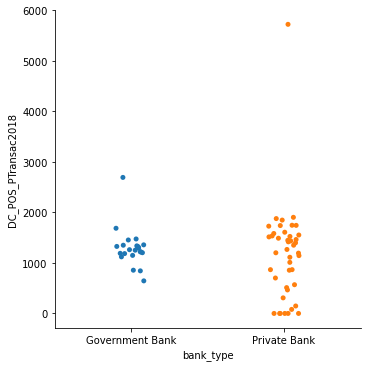

In [52]:
sns.catplot(data=df_2018,x='bank_type',y='DC_POS_PTransac2018')

**Inference**: 
- From the 2019 dataset, similarly like the 2018 dataset one can see that for both private and government the data is clustered around certain values. For government banks the data is clustered around INR 1000-2000 per transaction for debit cards.
- For private banks the range is more wide i.e, from 0 to 2000 INR. There is one outlier value in private banks where one bank has an average transaction of INR 5000.

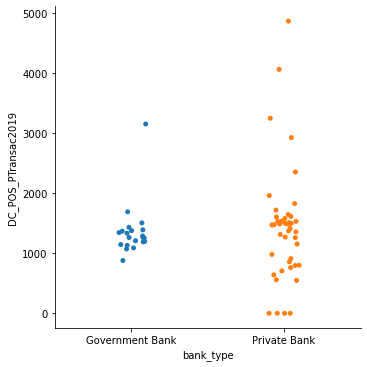

In [53]:
sns.catplot(data=df_2019,x='bank_type',y='DC_POS_PTransac2019')

## Merging Dataframes

The two sorted dataframes of 2018 and 2019 will be merged to get the year-on-year performance of each bank based on certain categories. So there will be merged dataframes for both government and private banks. This will be helpful in understanding which government/private banks had standout performance on a yearly basis. 

### Private Banks Debit Card POS Machines

In [54]:
pvt_dcpos_2019=private_2019[['Bank Name','DC_POS_Transaction','DC_POS_PTransac2019']]

In [55]:
pvt_dcpos_2018=private_2018[['Bank Name','DC_POS_Transaction','DC_POS_PTransac2018']]

Creating new dataframe consisting of the above 5 columns (Bank Name will be similar for both)

In [56]:
pvt_dcpos_combined=pd.merge(left=pvt_dcpos_2019,right=pvt_dcpos_2018,left_on='Bank Name',right_on='Bank Name')
pvt_dcpos_combined.head(2)

,Bank Name,DC_POS_Transaction_x,DC_POS_PTransac2019,DC_POS_Transaction_y,DC_POS_PTransac2018
0,IDBI LTD,6327793,1372.945740,7331453,1011.880551
1,AXIS BANK LTD,28524901,1509.317696,23046431,1464.204999


In [57]:
#Renaming columns to avoid confusion
pvt_dcpos_combined=pvt_dcpos_combined.rename(columns={'DC_POS_Transaction_x':'DC_POS_Transaction_2019','DC_POS_Transaction_y':'DC_POS_Transaction_2018'})

In [58]:
pvt_dcpos_combined.head(1)

,Bank Name,DC_POS_Transaction_2019,DC_POS_PTransac2019,DC_POS_Transaction_2018,DC_POS_PTransac2018
0,IDBI LTD,6327793,1372.94574,7331453,1011.880551


Finding out **Year on Year Growth** for both ***number of transactions*** as well as ***average value per transaction for a card***
> Formula to be used: YOY growth (in absolute terms): (Final Value (2019)-Initial Value(2018))/Initial value(2018)

- YoY growth for Average Value per transaction **Debit Card** POS machines: ***PRIVATE BANKS***

In [59]:
pvt_dcpos_combined['YoY_growth_PTransac']=((pvt_dcpos_combined['DC_POS_PTransac2019']-pvt_dcpos_combined['DC_POS_PTransac2018'])/pvt_dcpos_combined['DC_POS_PTransac2018'])*100

- YoY growth for number of Transactions **Debit Card** POS Machines: ***PRIVATE BANKS***

In [60]:
pvt_dcpos_combined['YoY_gr_Transac']=((pvt_dcpos_combined['DC_POS_Transaction_2019']-pvt_dcpos_combined['DC_POS_Transaction_2018'])/pvt_dcpos_combined['DC_POS_Transaction_2018'])*100

Below, it can be seen that the new columns are added to the dataframe. This dataframe will be further used for analysis. 
> **Note**: The percentage sign is not shown to avoid miscalculations. But all the growth rates are multiplied by 100 and can be considered as the accurate percentage

In [61]:
pvt_dcpos_combined.head(2)

,Bank Name,DC_POS_Transaction_2019,DC_POS_PTransac2019,DC_POS_Transaction_2018,DC_POS_PTransac2018,YoY_growth_PTransac,YoY_gr_Transac
0,IDBI LTD,6327793,1372.945740,7331453,1011.880551,35.682590,-13.689783
1,AXIS BANK LTD,28524901,1509.317696,23046431,1464.204999,3.081037,23.771446


- To find out the number of '0' values in the dataset. We will count it out and try to remove them from the dataset. After running the below code one can find that 20 values are there in the dataset which has '0' in it.

In [62]:
num = 0
for i in pvt_dcpos_combined.columns:
    num += pvt_dcpos_combined[i][pvt_dcpos_combined[i]==0].count()
num

20

> Replacing the '0' values in the dataset with 'Nan' and then dropping them from the dataset. This will give us a much **arranged dataset** to work on

In [63]:
nan_value=float("Nan")
pvt_dcpos_combined.replace(0,nan_value,inplace=True)

In [64]:
pvt_dcpos_combined=pvt_dcpos_combined.dropna()

### Steps for Visualisation of growth rates

- Even after dropping the 0 values the dataset is still large. We need to make it more compressed to show the values which matter for data visualisation
- The next step is to figure out the banks which have maintained a consistent transaction level across two years. So a minimum threshold value of **500,000** transactions are set for the private banks to qualify 

In [65]:
pvt_dcpos_combined=pvt_dcpos_combined[(pvt_dcpos_combined['DC_POS_Transaction_2018']>500000) & (pvt_dcpos_combined['DC_POS_Transaction_2019']>500000)]

- On applying those restrictions we see that 16 banks have maintained a stady transaction level

### Visualisation using Seaborn: YoY growth of average value of transaction of Debit Cards for Private Banks

> A horizontal bar graph has been used to show how the banks have done over the past year. 
- On Y axis is the Bank Name
- On X axis is the YoY growth

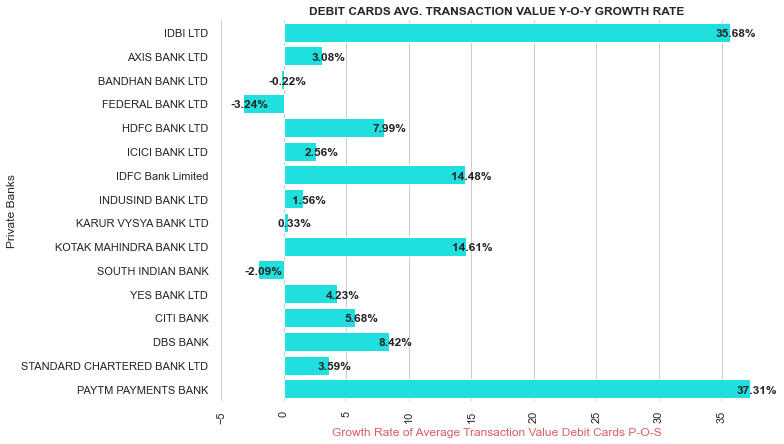

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_color_codes('muted')
plt.figure(figsize=(10,7))
ax=sns.barplot(x='YoY_growth_PTransac', y='Bank Name', data=pvt_dcpos_combined, color='cyan',ci='None')
plt.ylabel("Private Banks")
plt.xlabel("Growth Rate of Average Transaction Value Debit Cards P-O-S", color='r')
plt.xticks(rotation=90)
plt.title('DEBIT CARDS AVG. TRANSACTION VALUE Y-O-Y GROWTH RATE',fontweight='bold')
sns.despine(left=True, bottom=True)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center',fontweight='bold')

### Inference:
 
> From the above chart we can see that most of the banks had a **positive growth rate**. 
> Banks such as **PAYTM, KOTAK, IDFC and IDBI** have outperformed other banks
- This can be attributed to a few things such as:
1. The propensity to spend increased within a year even though the Indian economy was rocked by various internal as well as external setbacks.
2. With the advent of digitisation and consumers embracing a cashless economy, these are some of the indicators why banks have shown an increase in average revenue per transaction
3. As will be shown below, most of the banks also saw a rise in **number of transactions** which indicate that people spent more and also frequently transacted more via POS or ATM's than the previous years.

### Data Visualisation of Number of Transactions Growth Rate for Debit cards

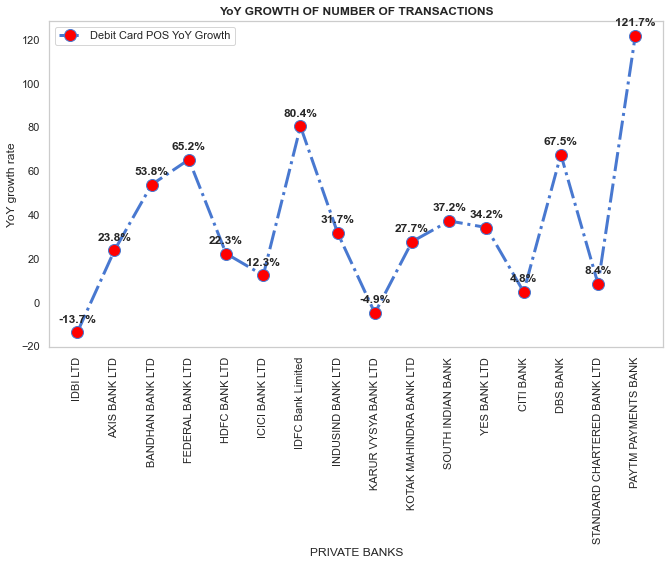

In [67]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
ax.tick_params(axis='x', labelrotation=45)
x = pvt_dcpos_combined["Bank Name"]
y = pvt_dcpos_combined["YoY_gr_Transac"]
plt.plot(x, y, color='b',label='Debit Card POS YoY Growth',marker='o', markerfacecolor='red',markersize=12,linestyle='dashdot', linewidth = 3)
plt.legend(loc='upper left')
axes2.set_ylabel('Total Number of Transactions',color='b')
plt.xticks(rotation=90)
plt.title('YoY GROWTH OF NUMBER OF TRANSACTIONS',fontweight='bold')
plt.xlabel('PRIVATE BANKS')
plt.ylabel('YoY growth rate')
plt.draw()
plt.grid(False)

for x1,y1 in zip(x,y):

    label = "{:.1f}%".format(y1)

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',fontweight='bold') # horizontal alignment can be left, right or center

plt.show()

## Private Banks Credit Cards POS Machines

In [68]:
pvt_ccpos_2019=private_2019[['Bank Name','CC_POS_Transaction','CC_POS_PTransac2019']]

In [69]:
pvt_ccpos_2018=private_2018[['Bank Name','CC_POS_Transaction','CC_POS_PTransac2018']]

### Merging Dataframes

In [70]:
pvt_ccpos_combined=pd.merge(left=pvt_ccpos_2019,right=pvt_ccpos_2018,left_on='Bank Name',right_on='Bank Name')
pvt_ccpos_combined.head(2)

,Bank Name,CC_POS_Transaction_x,CC_POS_PTransac2019,CC_POS_Transaction_y,CC_POS_PTransac2018
0,IDBI LTD,137806,2470.969672,158789,2255.585380
1,AXIS BANK LTD,16677302,3864.842951,13127005,3709.814795


In [71]:
pvt_ccpos_combined=pvt_ccpos_combined.rename(columns={'CC_POS_Transaction_x':'CC_POS_Transaction_2019','CC_POS_Transaction_y':'CC_POS_Transaction_2018'})

In [72]:
pvt_ccpos_combined.head(1)

,Bank Name,CC_POS_Transaction_2019,CC_POS_PTransac2019,CC_POS_Transaction_2018,CC_POS_PTransac2018
0,IDBI LTD,137806,2470.969672,158789,2255.58538


In [73]:
num1 = 0
for j in pvt_ccpos_combined.columns:
    num1 += pvt_ccpos_combined[j][pvt_ccpos_combined[j]==0].count()
num1

106

> From this above code we can see that there are around 106 values which have '0' in them. There is a requirement to remove them as they are not useful for further analysis.
> We would replace them by NaN and do the required analyis.

In [74]:
nan_value=float("Nan")
pvt_ccpos_combined.replace(0,nan_value,inplace=True)

In [75]:
pvt_ccpos_combined=pvt_ccpos_combined.dropna()

In [76]:
print(pvt_ccpos_combined.shape) 

(16, 5)


- YoY growth for Average Value per transaction **Credit Card** POS machines: ***PRIVATE BANKS***

In [77]:
pvt_ccpos_combined['YoY_growth_PTransacCC']=((pvt_ccpos_combined['CC_POS_PTransac2019']-pvt_ccpos_combined['CC_POS_PTransac2018'])/pvt_ccpos_combined['CC_POS_PTransac2018'])*100

- YoY growth for number of Transactions **Credit Card** POS Machines: ***PRIVATE BANKS***

In [78]:
pvt_ccpos_combined['YoY_gr_TransacCC']=((pvt_ccpos_combined['CC_POS_Transaction_2019']-pvt_ccpos_combined['CC_POS_Transaction_2018'])/pvt_ccpos_combined['CC_POS_Transaction_2018'])*100

In [79]:
pvt_ccpos_combined.head(1)

,Bank Name,CC_POS_Transaction_2019,CC_POS_PTransac2019,CC_POS_Transaction_2018,CC_POS_PTransac2018,YoY_growth_PTransacCC,YoY_gr_TransacCC
0,IDBI LTD,137806.0,2470.969672,158789.0,2255.58538,9.548931,-13.214391


### Visualisation using Seaborn: YoY growth of average value of transaction of Credit Cards for Private Banks (POS Machines)

> A horizontal bar graph has been used to show how the banks have done over the past year. 
- On Y axis is the Bank Name
- On X axis is the YoY growth

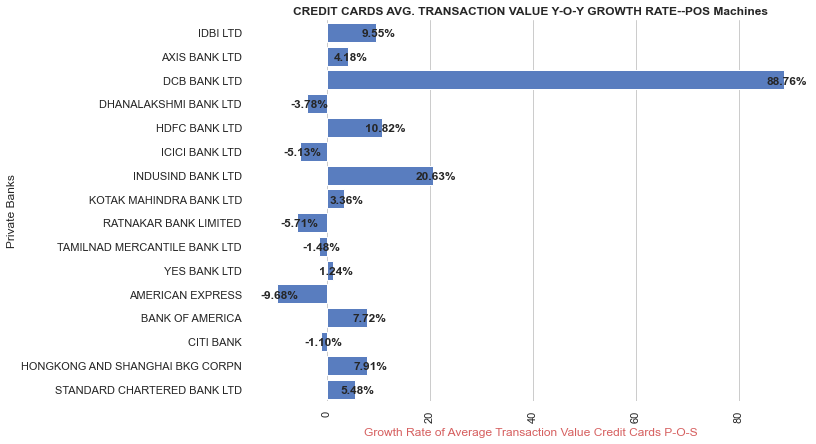

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_color_codes('muted')
plt.figure(figsize=(10,7))
ax=sns.barplot(x='YoY_growth_PTransacCC', y='Bank Name', data=pvt_ccpos_combined, color='b',ci='None')
plt.ylabel("Private Banks")
plt.xlabel("Growth Rate of Average Transaction Value Credit Cards P-O-S", color='r')
plt.xticks(rotation=90)
plt.title('CREDIT CARDS AVG. TRANSACTION VALUE Y-O-Y GROWTH RATE--POS Machines',fontweight='bold')
sns.despine(left=True, bottom=True)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center',fontweight='bold')
    
plt.savefig('credit_cards.png',bbox_inches='tight',pad_inches=2,transparent=True)

### Inference:
 
> From the above chart we can see that a 50-50 split of banks b/w **positive growth rate** and **negative growth rate**. 
> Banks such as **DCB, HDFC, INDUSIND** have outperformed other banks in terms of growth rate.
- But it is imprtant to understand how these growth rates stand with the Transaction values. Some banks may show exemplary performance but their transaction levels are **meager** compared to banks such as **HDFC** or **ICICI** who have a huge customer base. So outperforming them in terms of growth doesn't stand out much based on **transaction levels**

### Data Visualisation of Number of Transactions Growth Rate for Credit cards

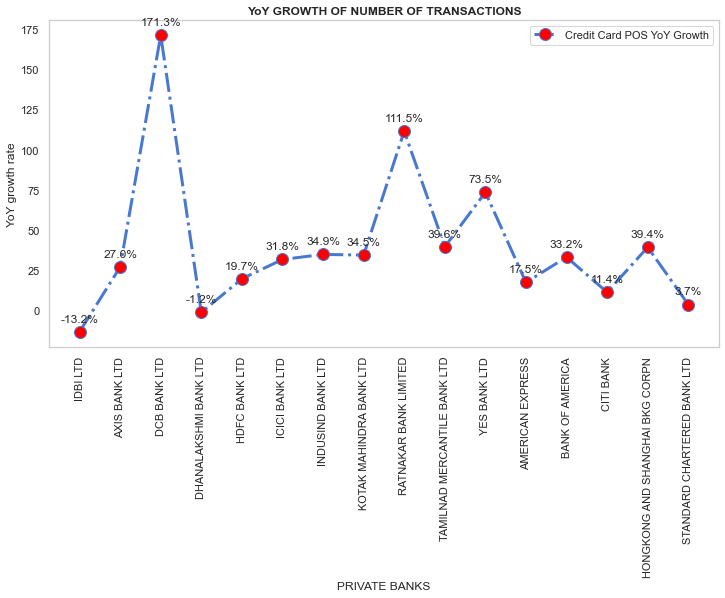

In [81]:
from matplotlib.pyplot import figure
figure(figsize=(12,6))
ax.tick_params(axis='x', labelrotation=45)
x = pvt_ccpos_combined["Bank Name"]
y = pvt_ccpos_combined["YoY_gr_TransacCC"]
plt.plot(x, y, color='b',label='Credit Card POS YoY Growth',marker='o', markerfacecolor='red',markersize=12,linestyle='dashdot', linewidth = 3)
plt.legend(loc='upper right')
axes2.set_ylabel('Total Number of Transactions',color='b')
plt.xticks(rotation=90)
plt.title('YoY GROWTH OF NUMBER OF TRANSACTIONS',fontweight='bold')
plt.xlabel('PRIVATE BANKS')
plt.ylabel('YoY growth rate')
plt.draw()
plt.grid(False)

for x1,y1 in zip(x,y):

    label = "{:.1f}%".format(y1)

    plt.annotate(label, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center



## BINNING DATA

The next step is to bin data based on certain factors. This will help us analyse the dataset from a different view; based on categories. 
> Once the data is divided into categories then further segregation can be done of the dataset to compare and then provide inference

### Private Banks Dataset 2018: POS Machine 
> We will be first conducting our analysis on the Debit Cards POS Machine variables and categorise them for further analysis.
- The main objective of binning is to divide the data based on certain prerequisites. For example if I want to bin on the basis of Transaction values, I can categorise certain values as **High** only after they cross a certain threshold. These steps are further elaborated in the following lines of code.

- ***Creating New dataframe consisting of CC transaction values,DC transaction values and the average revenue per transactions***

In [82]:
bin_private_2018=private_2018[['Bank Name','DC_POS_PTransac2018','CC_POS_PTransac2018','POS_Online','CC_POS_Transaction','DC_POS_Transaction']]

In [83]:
bin_private_2018.set_index('Bank Name').head(1)

,DC_POS_PTransac2018,CC_POS_PTransac2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction
Bank Name,,,,,
IDBI LTD,1011.880551,2255.58538,30102,158789,7331453


- From previous datasets it is known that 'O values are there in the dataset. So converting those '0's to NaN to compress the dataset as those will be dropped. 

In [84]:
nan_value=float("Nan")
bin_private_2018.replace(0,nan_value,inplace=True)

C:\Users\sanyalam\Anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [85]:
bin_pvt_DCPOS=bin_private_2018[bin_private_2018['DC_POS_PTransac2018'].notna()]

> **Binning Process**: A function is created to divide the dataset based on cut points. The cutpoints will be then arranged as values to be used for binning. 

In [86]:
def binfunction(col,cut_points,labels=None):
    minval=col.min()
    maxval=col.max()
    break_points=[minval]+cut_points+[maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
    colBin=pd.cut(col,bins=break_points,labels=labels,include_lowest=True,duplicates="drop")
    return colBin

- The dataset is divided into **four labels** based on average revenue per transaction type. *ARPT: Average revenue per transaction
1. Anything below 500 ARPT: Low 
2. Between 500-1000 ARPT: Average
3. Between 1000-1500 ARPT: Above Average
4. Anything greater than 1500: 'High'

> The cut points for binning were chosen as such on closer analysis of the dataset. Most of the values for average DC transactions were clustered between these values. There are extremes in the dataset like the max: 5725 and min:80 but both dont have much influence in further analysis

In [87]:
cut_points=[500,1000,1500]
labels=["Low","Average","Above average","High"]
bin_pvt_DCPOS["Combined_category_DC"]=binfunction(bin_pvt_DCPOS["DC_POS_PTransac2018"],cut_points,labels)
bin_pvt_DCPOS.head(5)

[79.93376486527171, 500, 1000, 1500, 5725.9616000000005]


<ipython-input-87-bb2db5e2b483>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_pvt_DCPOS["Combined_category_DC"]=binfunction(bin_pvt_DCPOS["DC_POS_PTransac2018"],cut_points,labels)


,Bank Name,DC_POS_PTransac2018,CC_POS_PTransac2018,POS_Online,CC_POS_Transaction,DC_POS_Transaction,Combined_category_DC
19,IDBI LTD,1011.880551,2255.585380,30102.0,158789.0,7331453.0,Above average
21,AXIS BANK LTD,1464.204999,3709.814795,505792.0,13127005.0,23046431.0,Above average
22,BANDHAN BANK LTD,1535.202965,NaN,22401.0,NaN,610698.0,High
23,CATHOLIC SYRIAN BANK LTD,1848.985839,NaN,NaN,NaN,165740.0,High
25,DCB BANK LTD,1903.629616,933.888026,1580.0,73901.0,307424.0,High


In [88]:
bin_pvt_DCPOS.drop(columns=['CC_POS_PTransac2018','CC_POS_Transaction'],axis=1)

,Bank Name,DC_POS_PTransac2018,POS_Online,DC_POS_Transaction,Combined_category_DC
19,IDBI LTD,1011.880551,30102.0,7331453.0,Above average
21,AXIS BANK LTD,1464.204999,505792.0,23046431.0,Above average
22,BANDHAN BANK LTD,1535.202965,22401.0,610698.0,High
23,CATHOLIC SYRIAN BANK LTD,1848.985839,NaN,165740.0,High
25,DCB BANK LTD,1903.629616,1580.0,307424.0,High
26,DHANALAKSHMI BANK LTD,1583.415430,1114.0,225660.0,High
27,FEDERAL BANK LTD,1524.881522,11049.0,3155567.0,High
28,HDFC BANK LTD,1418.144113,414056.0,41316850.0,Above average
29,ICICI BANK LTD,1447.915133,333074.0,37037674.0,Above average
30,IDFC Bank Limited,856.039833,1642.0,835786.0,Average


- Value counts function shows us the number of banks in each category based on their bin ranks. So we can see that most of the banks are lying between high and above average levels. 

In [89]:
bin_pvt_DCPOS['Combined_category_DC'].value_counts()

High             14
Above average    13
Average           6
Low               4
Name: Combined_category_DC, dtype: int64

### Data Visualisation of Binned Data

- Since the number of banks are really high it will be difficult to plot them on a single graph. Hence, we have taken the top ten banks based on transaction levels on 2018. They will be ranked from highest to lowest

In [90]:
top10_dc_pos2018=bin_pvt_DCPOS.sort_values(by='DC_POS_Transaction',ascending=False).head(10)

In [91]:
top10_dc_pos2018['POS_Online']=top10_dc_pos2018['POS_Online'].fillna(0)

In [92]:
median2=top10_dc_pos2018.DC_POS_PTransac2018.median()
median2

1426.8578978439623

### Data Visualisation of binned data using seaborn

- Here we have used a particular feature of seaborn known as 'Hue', these can plot the bars based on their categorical features. 
- Since a category is already applied one can visualise how the banks stack up against each other
> Points to Note: Thedataset is already arranged based on number of transactions. So in top 10, **HDFC** has the highest for the month of May,2018
- I have decided to two axis labels because I wanted to show if number of **P-O-S** machines online from the bank do have any effect on transaction levels
1. Left Y-Axis: Average Transaction values for DC P-O-S Machines
2. Right Y-Axis: Number of P-O-S machines online from bank
3. X-Axis: Bank Name

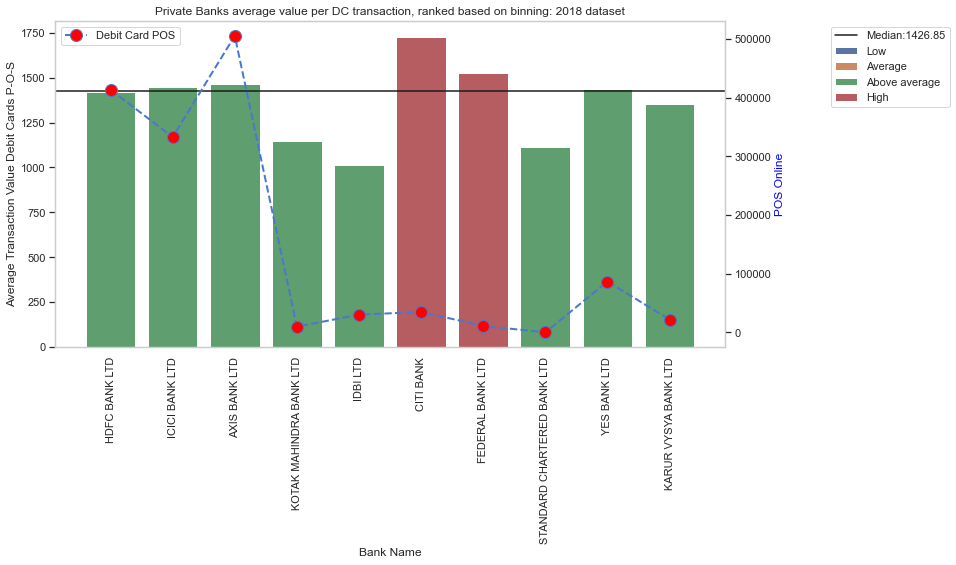

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_dc_pos2018,x='Bank Name',y='DC_POS_PTransac2018',hue='Combined_category_DC',dodge=False)
plt.title('Private Banks average value per DC transaction, ranked based on binning: 2018 dataset')
plt.axhline(median2,color='k',linestyle="-",label='Median:1426.85')
plt.ylabel('Average Transaction Value Debit Cards P-O-S')
plt.legend(bbox_to_anchor=(1.15,1),loc='upper left')
plt.grid(False)
plt.xticks(rotation=90)

x = top10_dc_pos2018["Bank Name"]
y = top10_dc_pos2018["POS_Online"]
axes2 = plt.twinx()
axes2.plot(x, y, color='b',label='Debit Card POS',marker='o', markerfacecolor='red',markersize=12,linestyle='dashed', linewidth = 2)
plt.legend(loc='upper left')
axes2.set_ylabel('POS Online',color='blue')
plt.grid(False)


### Inference: 

The number of POS online doesnt play a major hand in the average value per transaction because in the above chart, around 60% of the banks have 0-50,000 machines online(which is really insignificant)

>  We can also see that 80% of the banks are categorised in binning as **above average** whereas only 20% are **high**
- So, on analysis it can be seen that banks eventhough they have high transaction levels have maintained the average amount to be at par with the banks with lower transaction levels.
- Banks such as HDFC and ICICI have deployed a lot of their P-O-S machines which have increased their number of transactions significantly but their turnover per customer is not as high as banks like CITI who have no P-O-S machines in the Indian market ar all.
- This also gives a grim picture of the purchasing power of Indian customers based on their purchasing value. INR 1800 is around 25 USD in 2018, which is very less. Banks should be wary of that deploying more POS machines because the cost cannot of maintenace will be higher than average transaction value.

## Conclusion:

This brings us to the end of the first part of the 2018 and 2019 bank transactions analysis. The main motive of this part was to show the thinking process behind how I am able to show the analysis. 
- Since my project revolved around around Point of Sales machines this project is focused on that. 
- Part I was just the basics of how I wrought the dataset to my requirements
> Further in depth analysis of different components are done in the second part along with data Visualisation as well. Please do give it a read also to see how the banks are stacked up against each other based on various properties and requirements. 

In conclusion, one would see that the Indian economy has been embracing the digitisation well. From 2018-2019, the number of transactions have mostly increased for all banks in both CC and DC, which shows transactions in this field will increase more over time and the dependency on cash will reduce.

> The banks should also try to deploy more of their P-O-S machines and sell them to merchants, this would see more incomes coming in for the banks and more average per revenue in terms of transactions. 